In [6]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
import schemdraw
import schemdraw.elements as elm
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

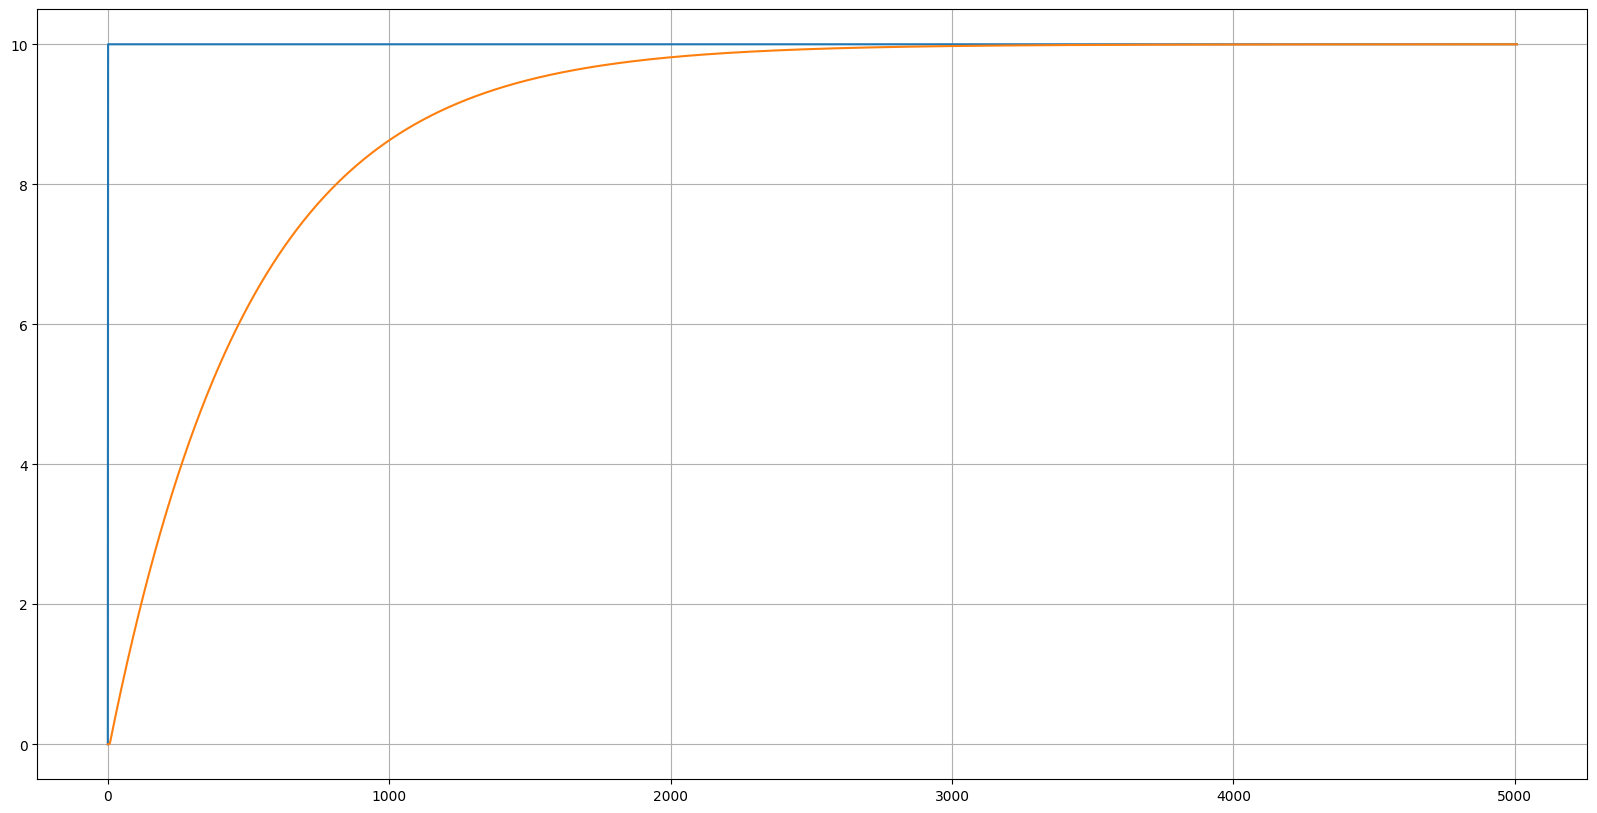

In [12]:
circuit = Circuit("Circuit 5")
#source = circuit.VoltageSource('input', 'in', circuit.gnd, 10@u_V)
source = circuit.PieceWiseLinearVoltageSource('input', 'in', circuit.gnd, values=[(0,0),(0,10@u_V)])
#source = circuit.PulseVoltageSource('input', 'in', circuit.gnd, initial_value=0@u_V, pulsed_value=10@u_V,pulse_width=100@u_ms, period=200@u_ms)

R1 = circuit.R("1", "in", "out", 100@u_kOhm)
C1 = circuit.C("1","out",circuit.gnd,0.1@u_uF)
simulator = circuit.simulator(temperature = 25)
analysis = simulator.operating_point()

figure, ax = plt.subplots(figsize=(20, 10))
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
step_time = 20@u_us
end_time = 100@u_ms
analysis = simulator.transient(step_time=step_time, end_time=end_time)

ax.grid()
ax.plot(analysis['in'],label = "V")
ax.plot(analysis['out'],label = "C")
